In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#df = pd.read_csv('RBIB_Economic_dataset_final.csv', index_col='Date', parse_dates=True)
df = pd.read_csv('RBIB_Economic_dataset_final.csv')

In [ ]:
df.index

RangeIndex(start=0, stop=141, step=1)

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
#data = df.set_index('month',append=True)

In [ ]:
print('Shape of Data', df.shape)

Shape of Data (141, 39)


In [ ]:
df.head()

,Index of Industrial Production,Deposits,Credit,Non-food Credit,Investment in Govt. Securities,Reserve Money (M0),Broad Money (M3),Cash Reserve Ratio,Statutory Liquidity Ratio,Cash-Deposit Ratio,...,3-month (%),6-month (%),All India Consumer Price Index,Consumer Price Index for Industrial Workers,Wholesale Price Index,Primary Articles,Fuel and Power,Manufactured Products,Imports,Exports
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-01,2.68,16.98,15.97,15.76,17.15,12.21,16.00,6.0,24.0,6.66,...,6.76,6.23,NaN,6.49,7.74,3.59,14.98,7.64,27.08,8.64
2011-11-01,6.01,16.45,17.66,17.36,16.09,13.72,15.48,6.0,24.0,7.02,...,4.98,4.14,NaN,9.34,9.46,8.90,15.48,8.17,35.57,3.08
2011-10-01,-4.98,15.29,19.31,18.95,13.61,18.39,14.88,6.0,24.0,7.28,...,5.73,4.75,NaN,9.39,9.87,10.96,14.79,8.05,26.84,23.85
2011-09-01,2.5,17.48,19.55,19.31,15.63,15.42,16.62,6.0,24.0,6.98,...,5.15,3.70,NaN,10.06,10.00,12.22,14.02,8.00,34.71,39.91
2011-08-01,3.4,17.96,20.68,20.18,15.34,16.42,17.06,6.0,24.0,7.22,...,2.91,2.89,NaN,8.99,9.78,12.46,12.91,7.87,47.50,39.54


In [ ]:
df.isna().sum()

   Index of Industrial Production                 0
Deposits                                          0
Credit                                            0
Non-food Credit                                   0
Investment in Govt. Securities                    0
Reserve Money (M0)                                0
Broad Money (M3)                                  0
Cash Reserve Ratio                                0
Statutory Liquidity Ratio                         0
Cash-Deposit Ratio                                0
Credit-Deposit Ratio                              0
Incremental Credit-Deposit Ratio                  0
Investment-Deposit Ratio                          0
Incremental Investment-Deposit Ratio              0
Policy Repo Rate                                  0
Reverse Repo Rate                                 0
Marginal Standing Facility (MSF) Rate             0
Bank Rate                                         0
Base Rate                                         2
Term Deposit

In [ ]:
df.drop(columns=['Credit','Non-food Credit','Reserve Money (M0)','Broad Money (M3)','Cash Reserve Ratio'
, 'Cash-Deposit Ratio','Credit-Deposit Ratio','Incremental Credit-Deposit Ratio'
                                               ,'All India Consumer Price Index','Consumer Price Index for Industrial Workers'
                                               ,'Wholesale Price Index','Manufactured Products','Investment-Deposit Ratio'
                                               ,'Incremental Investment-Deposit Ratio',
                                               'Marginal Standing Facility (MSF) Rate','Bank Rate','Base Rate',
                                               'Call Money Rate (Weighted Average)','91-Day Treasury Bill (Primary) Yield'
                                               ,'182-Day Treasury Bill (Primary) Yield','364-Day Treasury Bill (Primary) Yield'
                                               ,'10-Year G-Sec Par Yield (FBIL)','INR-US$ Spot Rate (Rs. Per Foreign Currency)'
                                               ,'INR-Euro Spot Rate (Rs. Per Foreign Currency)','Forward Premia of US$ 1-month (%)'
                                               ,'3-month (%)','6-month (%)','Term Deposit Rate >1 Year',
                                               'Savings Deposit Rate','Investment in Govt. Securities','Deposits'], inplace=True)

In [ ]:
df.head()

,Index of Industrial Production,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Primary Articles,Fuel and Power,Imports,Exports
Date,,,,,,,,
2011-12-01,2.68,24.0,8.50,7.50,3.59,14.98,27.08,8.64
2011-11-01,6.01,24.0,8.50,7.50,8.90,15.48,35.57,3.08
2011-10-01,-4.98,24.0,8.50,7.50,10.96,14.79,26.84,23.85
2011-09-01,2.5,24.0,8.25,7.25,12.22,14.02,34.71,39.91
2011-08-01,3.4,24.0,8.00,7.00,12.46,12.91,47.50,39.54


In [ ]:
df.drop(columns= ['   Index of Industrial Production'], inplace=True)

In [ ]:
df.head()

,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Primary Articles,Fuel and Power,Imports,Exports
Date,,,,,,,
2011-12-01,24.0,8.50,7.50,3.59,14.98,27.08,8.64
2011-11-01,24.0,8.50,7.50,8.90,15.48,35.57,3.08
2011-10-01,24.0,8.50,7.50,10.96,14.79,26.84,23.85
2011-09-01,24.0,8.25,7.25,12.22,14.02,34.71,39.91
2011-08-01,24.0,8.00,7.00,12.46,12.91,47.50,39.54


In [ ]:
df['Imports'].fillna(df['Imports'].mean(), inplace=True)
df['Exports'].fillna(df['Exports'].mean(), inplace=True)

In [ ]:
print(df.isnull().sum())

Statutory Liquidity Ratio    0
Policy Repo Rate             0
Reverse Repo Rate            0
Primary Articles             0
Fuel and Power               0
Imports                      0
Exports                      0
dtype: int64


<Axes: xlabel='Date'>

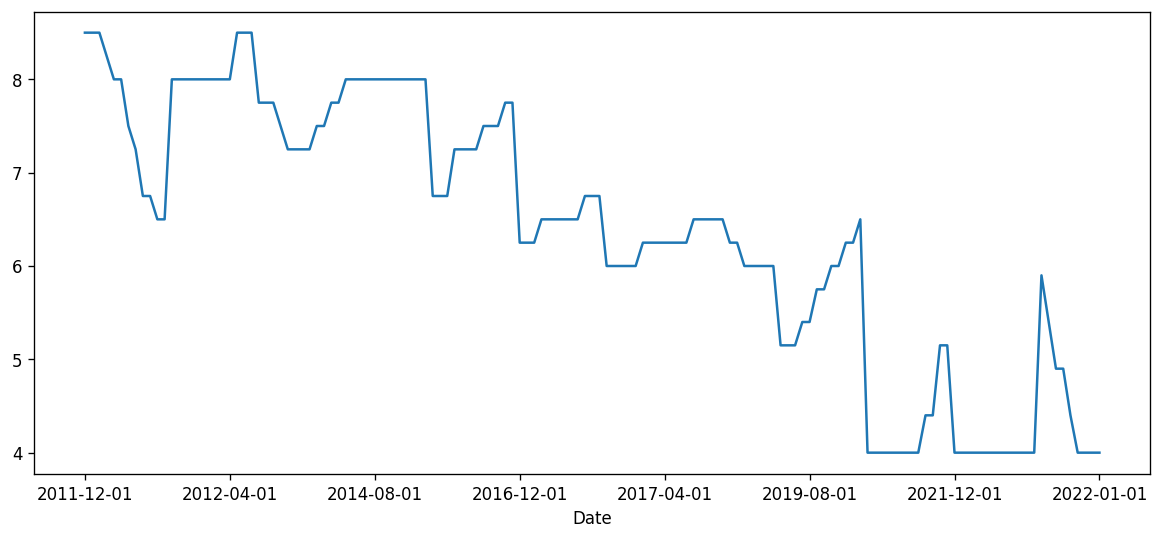

In [ ]:
df['Policy Repo Rate'].plot(figsize=(12,5))

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#from statsmodels.tsa.stattools import adfuller

#def ad_test(dataset):
 # dftest = adfuller(dataset,autolag = 'AIC')
  #print("1. ADF : ",dftest[0])
  #print("2. P-Value : ",dftest[1])
  #print("3. Num of Lags :", dftest[2])
  #print("4. Num of Observations used for ADF Regression and Critical Values Calculation :", dftest[3])
  #print("5. Critical Values :")
  #for key, val in dftest[4].items():
   # print("\t",key, ": ", val)

In [ ]:
adf_test(df['Policy Repo Rate'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.617832
p-value                          0.473866
#Lags Used                       0.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64


In [ ]:
#defining function for kpss test
from statsmodels.tsa.stattools import kpss
#defining KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key, val in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = val
      return kpss_output      

In [ ]:
kpss_test(df['Policy Repo Rate'])

Results of KPSS Test:


Test Statistic          1.544356
p-value                 0.010000
Lags Used               8.000000
Critical Value (10%)    0.347000
dtype: float64

In [ ]:
#df_log=np.sqrt(df['Policy Repo Rate']) ##Converting to stationary
#df_diff=df_log.diff().dropna()

In [ ]:
#result=adfuller (df_diff)
#print('Test Statistic: %f' %result[0])
#print('p-value: %f' %result[1])
#print('Critical values:')
#for key, value in result[4].items ():
     #print('\t%s: %.3f' %(key, value))

In [ ]:
#plt.figure(figsize=(15,8))
#plt.plot(df_diff,label="after")
#plt.plot(df ,label="before")
#plt.tick_params(
 #   axis='x',        
  #  which='both',   
   # bottom=False,      
    #top=False,        
    #labelbottom=False)
#plt.legend()
#plt.show() 

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

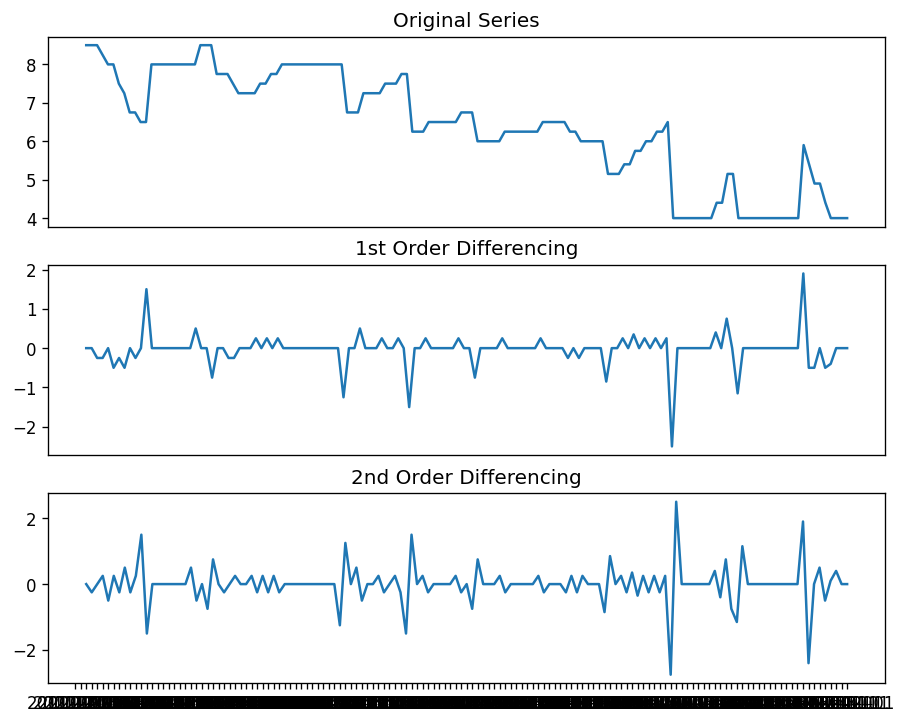

In [ ]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df['Policy Repo Rate']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(df['Policy Repo Rate'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)

#2nd order 
ax3.plot(df['Policy Repo Rate'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

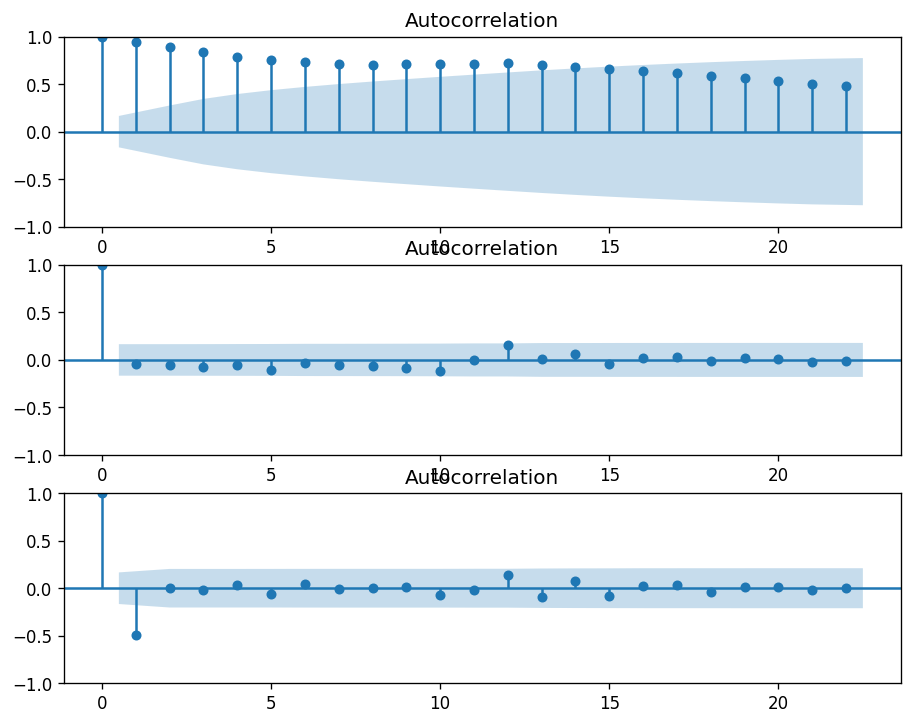

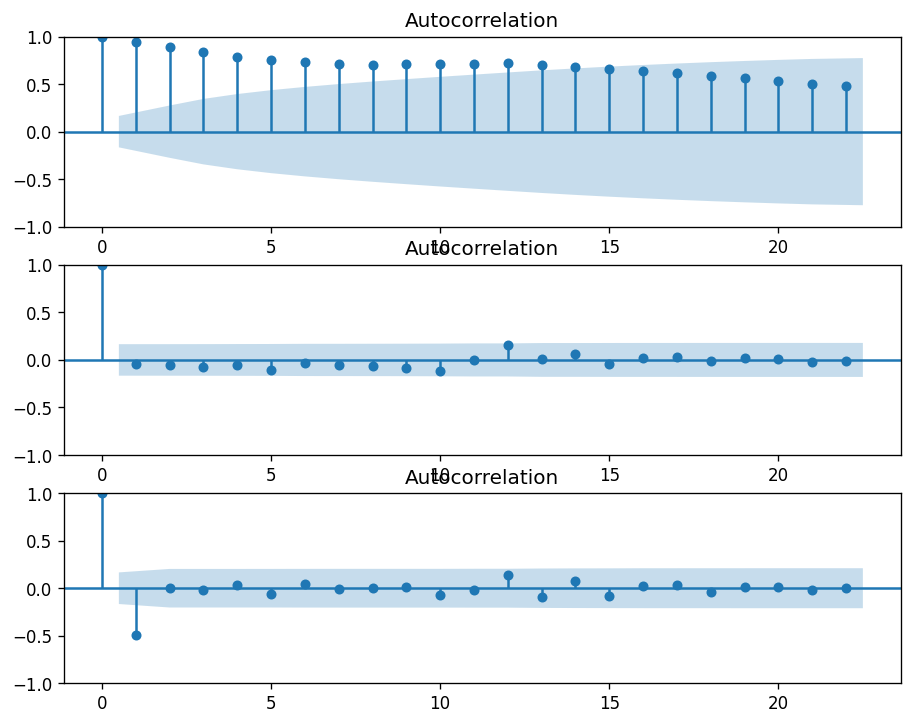

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df['Policy Repo Rate'], ax=ax1)
plot_acf(df['Policy Repo Rate'].diff().dropna(), ax=ax2)
plot_acf(df['Policy Repo Rate'].diff().diff().dropna(), ax=ax3)

#d=1


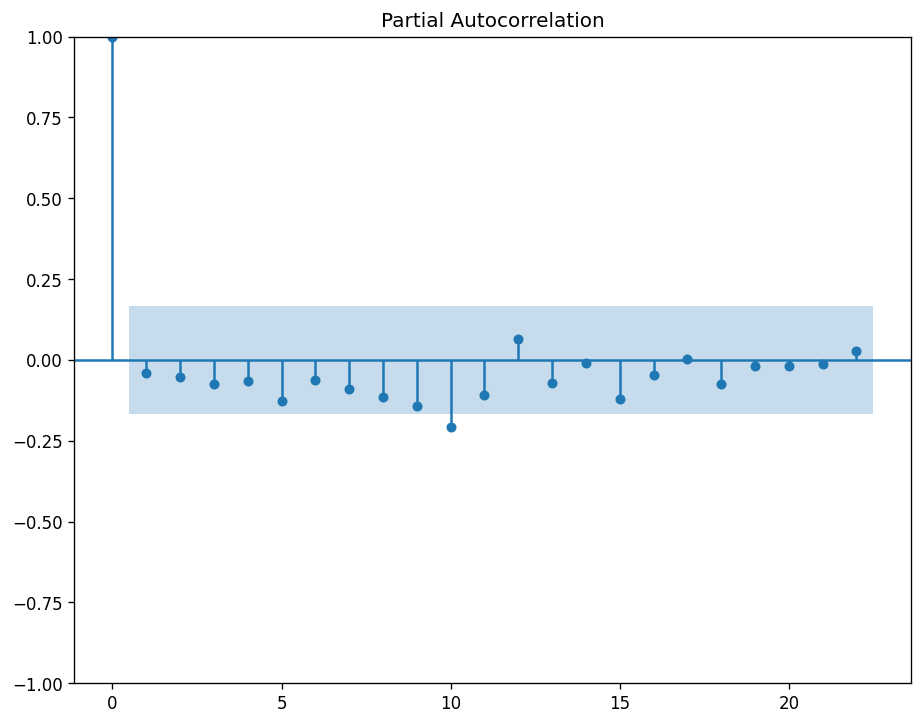

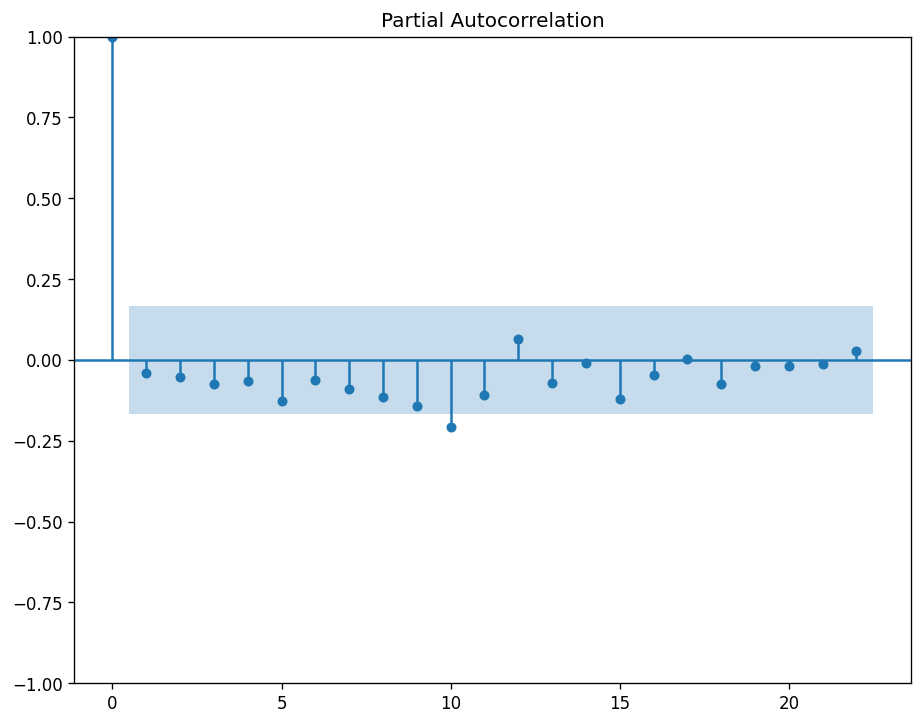

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Policy Repo Rate'].diff().dropna()) #p=1

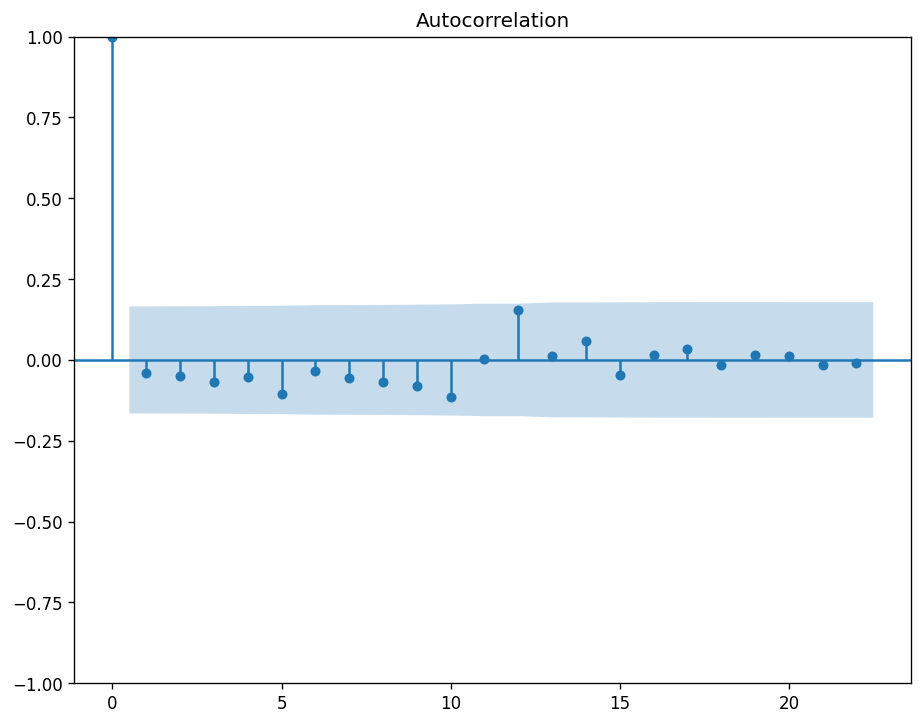

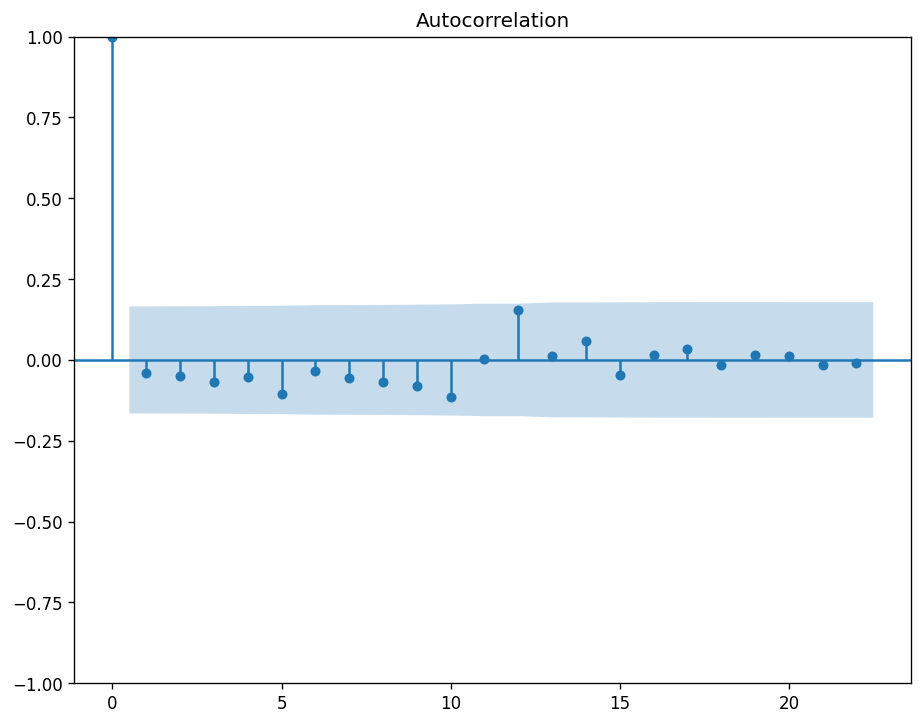

In [ ]:
plot_acf(df['Policy Repo Rate'].diff().dropna())#q=1

In [ ]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Policy Repo Rate'], trace=True, 
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=148.535, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=150.325, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=150.299, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=147.413, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.219 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  141
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -72.706
Date:                Mon, 24 Apr 2023   AIC                            147.413
Time:                        20:26:20   BIC                            150.354
Sample:                             0   HQIC                           148.608
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1654      0.007     24.299      0.000       0.152       0.179
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              1290.27
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                            -1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(141, 7)
(111, 7) (30, 7)


In [ ]:
model = sm.tsa.arima.ARIMA(train['Policy Repo Rate'], order=(3,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Policy Repo Rate   No. Observations:                  111
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -45.071
Date:                Mon, 24 Apr 2023   AIC                            104.141
Time:                        20:33:54   BIC                            123.045
Sample:                             0   HQIC                           111.809
                                - 111                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8151      0.093      8.766      0.000       0.633       0.997
ar.L2          0.8989      0.117      7.652      0.000       0.669       1.129
ar.L3         -0.9146      0.069    -13.171      0.000      -1.051      -0.779
ma.L1         -0.9271      0.316     -2.938      0.003      -1.546      -0.309
ma.L2         -0.9375      0.700     -1.338      0.181      -2.310       0.435
ma.L3          0.9675      0.411      2.354      0.019       0.162       1.773
sigma2         0.1291      0.038      3.392      0.001       0.055       0.204
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              1081.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -2.44
Prob(H) (two-sided):                  0.07   Kurtosis:                        17.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

111    4.165943
112    4.247875
113    4.493793
114    4.616106
115    4.861922
116    4.947305
117    5.125997
118    5.123564
119    5.204118
120    5.104152
121    5.097311
122    4.928196
123    4.875640
124    4.687039
125    4.640751
126    4.481555
127    4.482690
128    4.382846
129    4.448092
130    4.410482
131    4.529797
132    4.533562
133    4.678286
134    4.690500
135    4.827107
136    4.817061
137    4.920501
138    4.870837
139    4.932530
140    4.843561
Name: predicted_mean, dtype: float64
Date
2020-09-01    4.165943
2020-08-01    4.247875
2020-07-01    4.493793
2020-06-01    4.616106
2020-05-01    4.861922
2020-04-01    4.947305
2020-03-01    5.125997
2020-02-01    5.123564
2020-01-01    5.204118
2021-12-01    5.104152
2021-11-01    5.097311
2021-10-01    4.928196
2021-09-01    4.875640
2021-08-01    4.687039
2021-07-01    4.640751
2021-06-01    4.481555
2021-05-01    4.482690
2021-04-01    4.382846
2021-03-01    4.448092
2021-02-01    4.410482
2021-01-01    4.52

<Axes: xlabel='Date'>

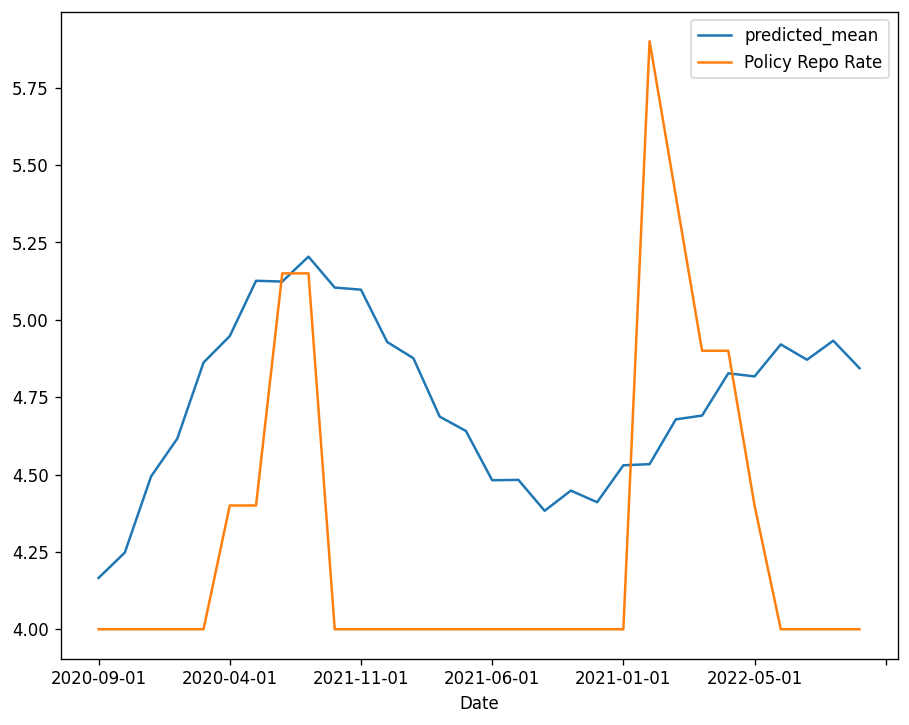

In [ ]:

pred.plot(legend=True)
test['Policy Repo Rate'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(test['Policy Repo Rate'], pred)

In [ ]:
mae

0.6054359782080323